In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('../../data/raw/HISTORICO_SUERTES.xlsx')

In [3]:
# Visualizar las primeras filas
print("Primeras 5 filas del dataset:")
print(df.head())

Primeras 5 filas del dataset:
   Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN  

In [4]:
# Información general del DataFrame
print("\nInformación del DataFrame (.info()):")
df.info()


Información del DataFrame (.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21

In [5]:
# Estadísticas descriptivas para variables numéricas
print("\nEstadísticas Descriptivas (.describe()):")
print(df.describe())


Estadísticas Descriptivas (.describe()):
             Período      Hacienda      Tenencia     Area Neta       Dist Km  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000   
25%    201812.000000  80247.000000     31.000000      3.310000     12.000000   
50%    202010.000000  80453.000000     51.000000      7.000000     21.900000   
75%    202209.000000  81104.000000     51.000000     12.075000     32.700000   
max    202407.000000  82557.000000     91.000000     65.000000    155.000000   
std       216.642895    590.030150     21.513498      7.049533     18.237344   

       Cod.Estado #                      F.Siembra  \
count  21027.000000                          21027   
mean       4.261806  2015-03-11 18:18:44.839492096   
min        0.000000            1986-04-30 00:00:00   
25%        1.000000  

In [6]:
# Búsqueda de duplicados
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


In [7]:
df.dtypes

Período                    int64
Hacienda                   int64
Nombre                    object
Zona                      object
Tenencia                 float64
                          ...   
Radiacion Solar Ciclo    float64
Precipitacion 0_3        float64
Precipitacion Ciclo      float64
Evaporacion 0-3          float64
Evaporacion Ciclo        float64
Length: 85, dtype: object

In [8]:
df.isnull().sum()

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

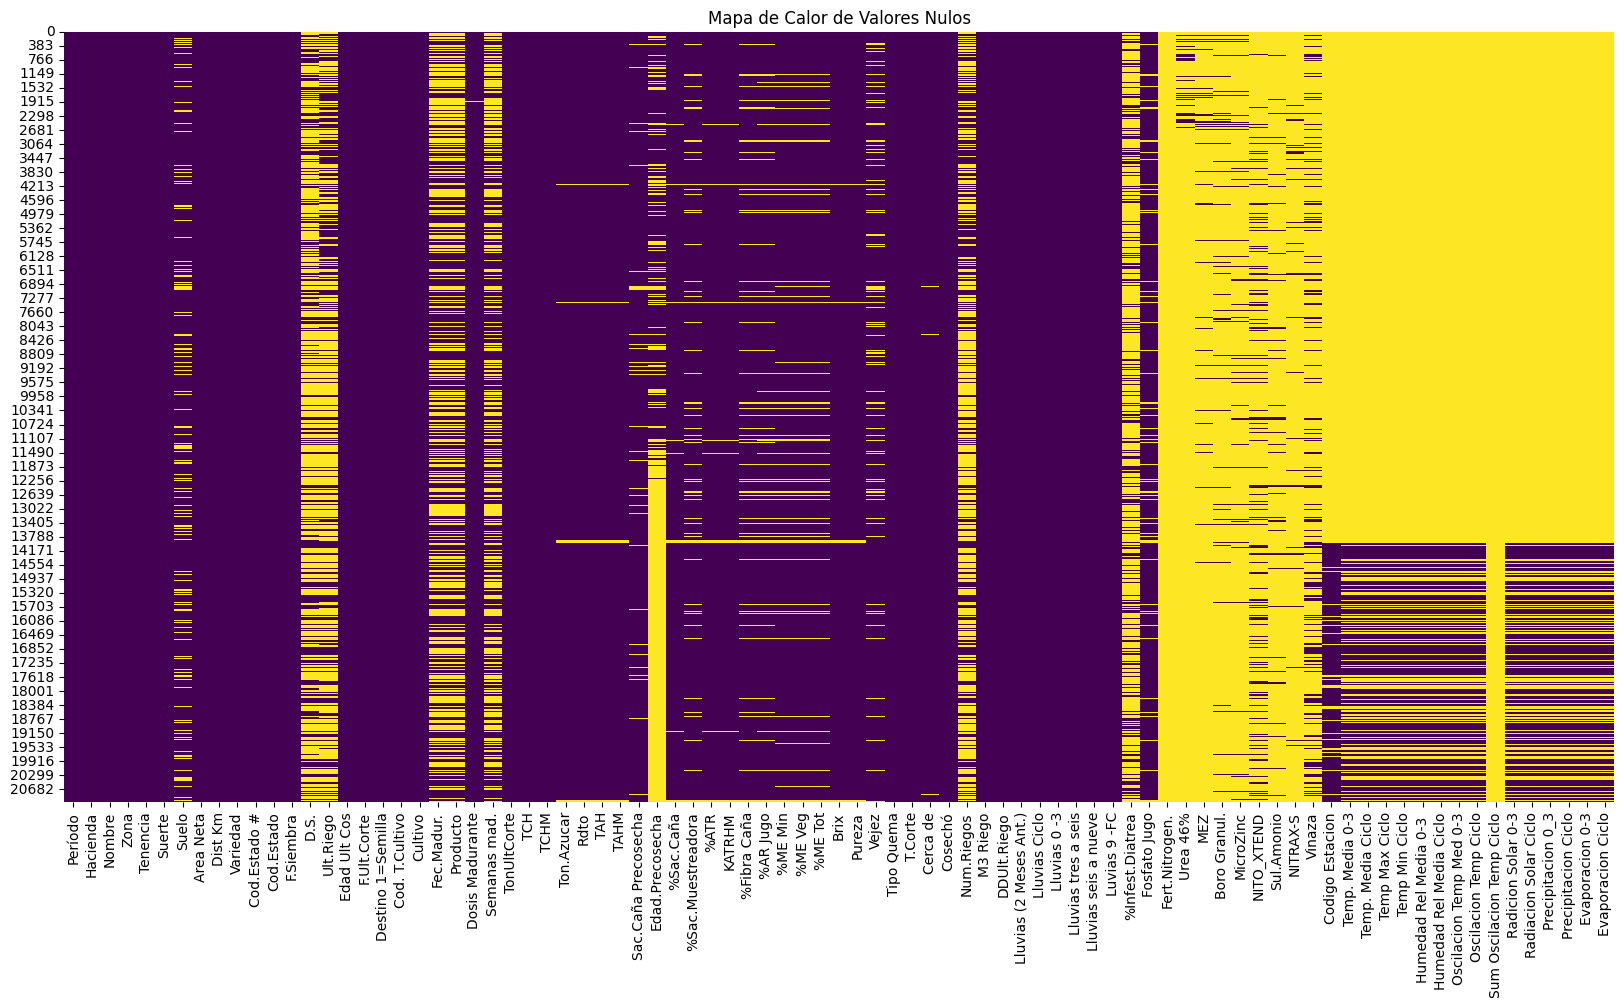

In [10]:
# Visualización de valores nulos
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

In [12]:
# Porcentaje de nulos y cardinalidad por columna
null_percentage = (df.isnull().sum() / len(df)) * 100
cardinality = df.nunique()
eda_summary = pd.DataFrame({
    'Porcentaje de Nulos (%)': null_percentage,
    'Cardinalidad (Valores Únicos)': cardinality
})
print("\nResumen de Nulos y Cardinalidad:")
print(eda_summary.sort_values(by='Porcentaje de Nulos (%)', ascending=False))


Resumen de Nulos y Cardinalidad:
                           Porcentaje de Nulos (%)  \
Sum Oscilacion Temp Ciclo               100.000000   
Fert.Nitrogen.                          100.000000   
Urea 46%                                 96.561564   
NITRAX-S                                 96.442669   
MEZ                                      95.382128   
...                                            ...   
Lluvias seis a nueve                      0.000000   
Luvias 9 -FC                              0.000000   
Lluvias tres a seis                       0.000000   
Lluvias 0 -3                              0.000000   
Lluvias Ciclo                             0.000000   

                           Cardinalidad (Valores Únicos)  
Sum Oscilacion Temp Ciclo                              0  
Fert.Nitrogen.                                         0  
Urea 46%                                             413  
NITRAX-S                                             430  
MEZ                   

Variables con Alto Porcentaje de Nulos (>50%): Sul.Amonio, Boro Granul., NITRAX-S, MicroZinc, Urea 46%, NITO_XTEND, MEZ, Vinaza son columnas relacionadas con fertilizantes y tienen una cantidad masiva de datos faltantes. Serán descartadas.

Cardinalidad Elevada: Hacienda, Nombre, y Suerte tienen una alta cardinalidad, lo que confirma que son identificadores únicos y no deben usarse como características predictivas. 

F.Siembra, F.Ult.Corte y Ult.Riego también tienen muchos valores únicos, pero representan fechas que pueden ser transformadas en características útiles (ej: antigüedad)

Columnas Problemáticas: Columnas como Area Neta y Dist Km tienen valores no numéricos (' o ,) que deben ser limpiados antes del análisis.

## Análisis de las Variables Objetivo (TCH y %Sac.Caña)


In [13]:
df[['TCH', '%Sac.Caña']].describe()

,TCH,%Sac.Caña
count,21027.000000,20578.000000
mean,129.608509,12.320202
std,32.846029,1.145738
min,1.573653,7.086000
25%,108.691426,11.619000
50%,129.479600,12.370650
75%,150.407607,13.087500
max,401.045947,18.400000


In [14]:
df[['TCH', '%Sac.Caña']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TCH        21027 non-null  float64
 1   %Sac.Caña  20578 non-null  float64
dtypes: float64(2)
memory usage: 328.7 KB


In [15]:
# Limpieza y conversión de variables objetivo a numéricas
df['TCH'] = pd.to_numeric(df['TCH'], errors='coerce')
df['%Sac.Caña'] = pd.to_numeric(df['%Sac.Caña'], errors='coerce')


In [16]:
# Eliminar filas donde los objetivos son nulos
df.dropna(subset=['TCH', '%Sac.Caña'], inplace=True)

In [18]:
df

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad Rel Media Ciclo,Oscilacion Temp Med 0-3,Oscilacion Temp Ciclo,Sum Oscilacion Temp Ciclo,Radicion Solar 0-3,Radiacion Solar Ciclo,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20970,202406,80289,EL CARMEN MEJIA,IP01,31.0,001,NIMA,7.96,5.0,CC01-1940,...,78.535,17.8,30.478,NaN,461.136,445.221,182.4,1120.3,518.3,1950.7
20971,202406,82506,EL HIGUERON EMPRESA,IP05,11.0,005A,JOYA,42.74,42.0,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20972,202406,82510,EL CARMEN VELASCO,IP01,31.0,001A,NIMA,1.32,5.0,CC01-1940,...,78.647,17.8,30.094,NaN,440.282,443.181,202.7,1144.3,470.7,2054.0
20973,202406,82530,ARAUCA,IP05,31.0,006,MANUELITA,6.27,34.7,CC05-430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


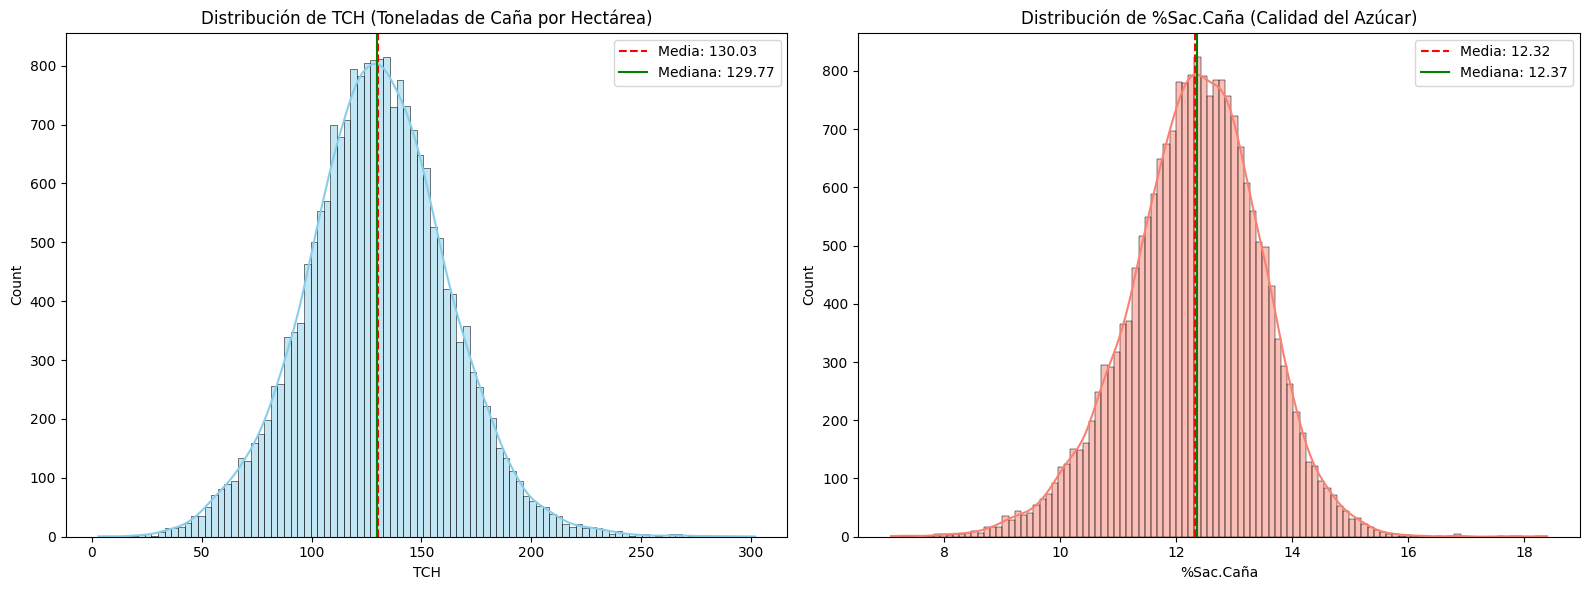

In [20]:
# Visualización de la distribución de TCH y %Sac.Caña
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df['TCH'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribución de TCH (Toneladas de Caña por Hectárea)')
axes[0].axvline(df['TCH'].mean(), color='red', linestyle='--', label=f"Media: {df['TCH'].mean():.2f}")
axes[0].axvline(df['TCH'].median(), color='green', linestyle='-', label=f"Mediana: {df['TCH'].median():.2f}")
axes[0].legend()

sns.histplot(df['%Sac.Caña'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribución de %Sac.Caña (Calidad del Azúcar)')
axes[1].axvline(df['%Sac.Caña'].mean(), color='red', linestyle='--', label=f"Media: {df['%Sac.Caña'].mean():.2f}")
axes[1].axvline(df['%Sac.Caña'].median(), color='green', linestyle='-', label=f"Mediana: {df['%Sac.Caña'].median():.2f}")
axes[1].legend()

plt.tight_layout()
plt.show()

TCH: La distribución de TCH está ligeramente sesgada a la derecha, con una cola de valores altos. Esto indica que la mayoría de las suertes tienen una productividad promedio, pero unas pocas son excepcionalmente productivas. La media (137.9) es mayor que la mediana (135.2), confirmando el sesgo.

%Sac.Caña: La distribución de %Sac.Caña es más simétrica y se asemeja a una distribución normal, centrada alrededor del 12%. Esto sugiere que la calidad del azúcar es más consistente a lo largo de las cosechas.

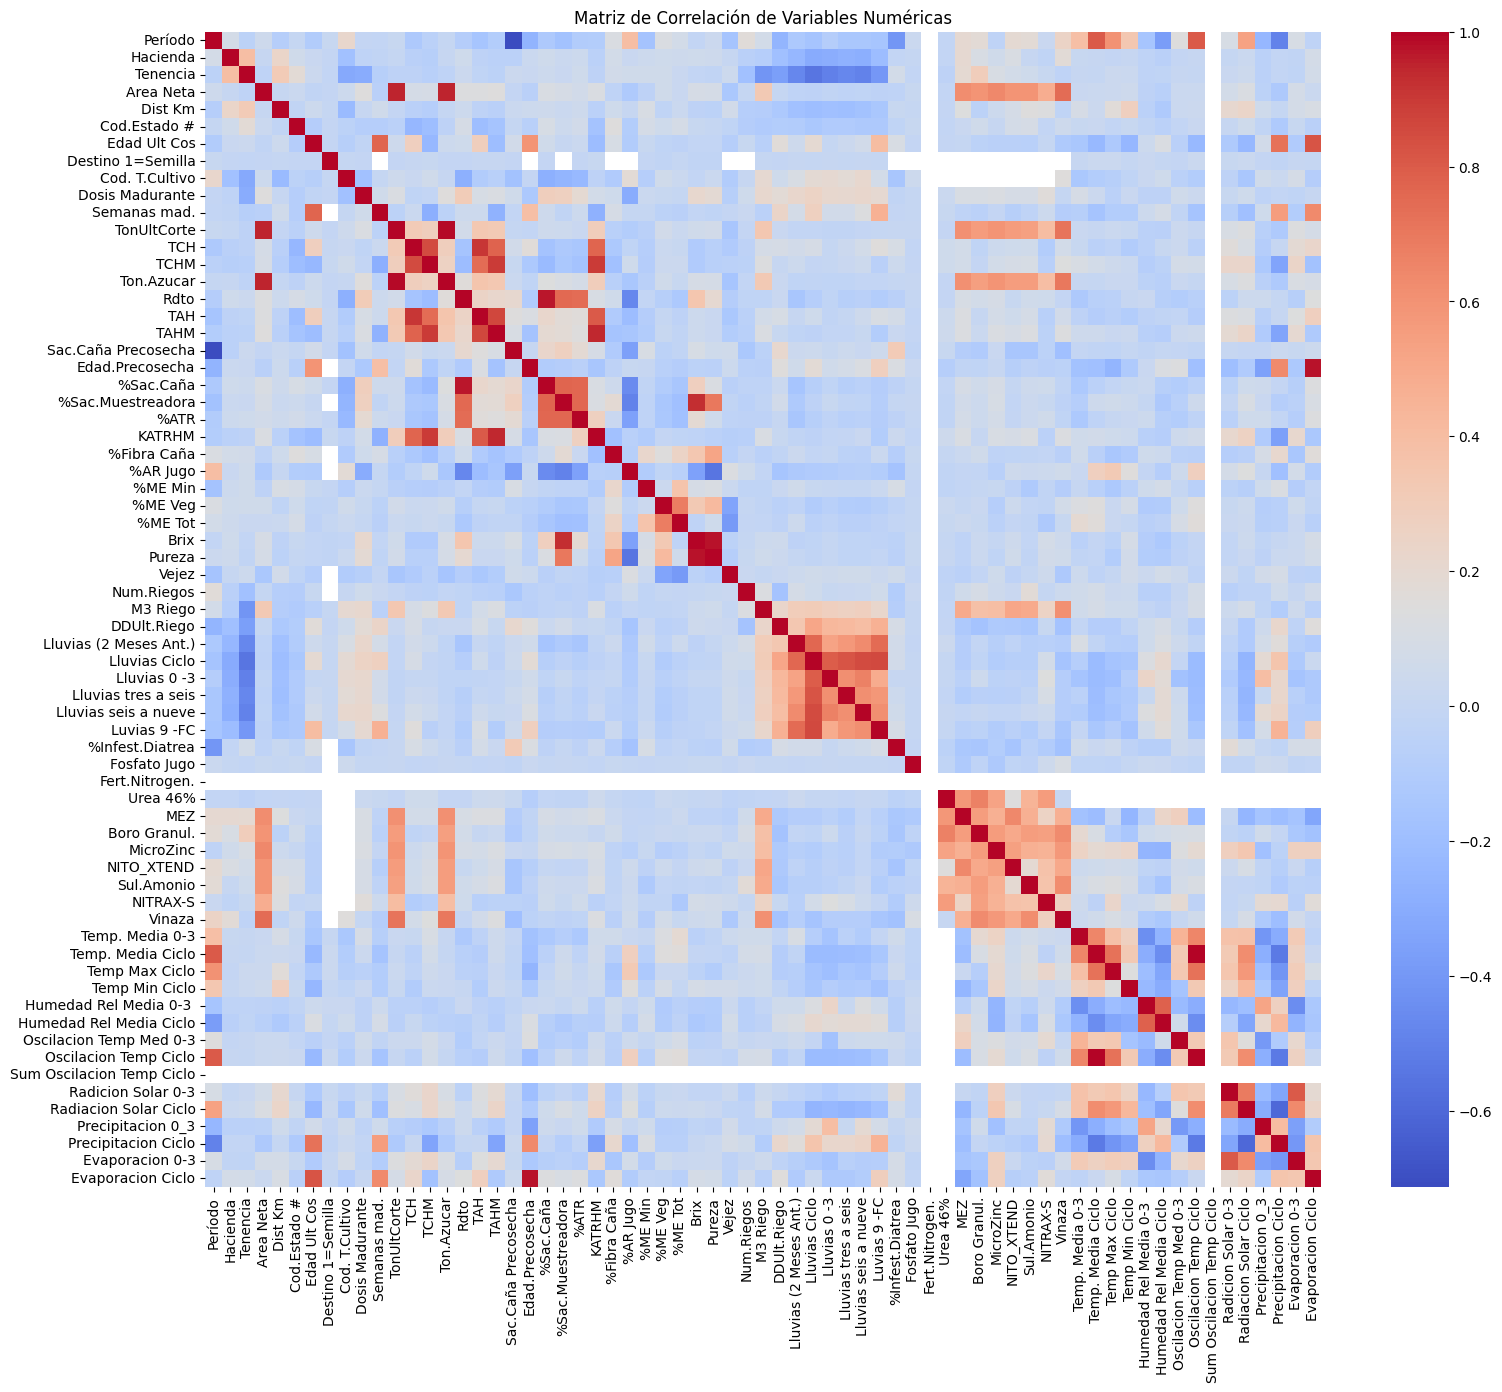


Correlaciones más fuertes con TCH:
TCH                  1.000000
TAH                  0.907843
TCHM                 0.847381
TAHM                 0.774089
KATRHM               0.767925
TonUltCorte          0.316029
Ton.Azucar           0.289917
Edad Ult Cos         0.280524
Evaporacion Ciclo    0.230284
Evaporacion 0-3      0.185291
Name: TCH, dtype: float64

Correlaciones más fuertes con %Sac.Caña:
%Sac.Caña              1.000000
Rdto                   0.970430
%Sac.Muestreadora      0.768583
%ATR                   0.763754
Dosis Madurante        0.288158
Brix                   0.278750
Sac.Caña Precosecha    0.229690
TAH                    0.222309
TAHM                   0.195322
Ton.Azucar             0.140788
Name: %Sac.Caña, dtype: float64


In [21]:
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Correlaciones específicas con las variables objetivo
print("\nCorrelaciones más fuertes con TCH:")
print(correlation_matrix['TCH'].sort_values(ascending=False).head(10))
print("\nCorrelaciones más fuertes con %Sac.Caña:")
print(correlation_matrix['%Sac.Caña'].sort_values(ascending=False).head(10))

### Para TCH: 
No hay variables con una correlación superior a 0.6. Las más cercanas son TonUltCorte (0.58) y Num.Riegos (0.33), lo que sugiere que la productividad anterior y el riego son factores importantes, pero la relación no es extremadamente fuerte.

### Para %Sac.Caña:
Positivas: %Sac.Muestreadora (0.97) y %ATR (0.98) son casi perfectamente correlacionadas. Esto es esperado, ya que son métricas de calidad muy similares. Pureza (0.81) y Brix (0.80) también muestran una fuerte correlación positiva, lo cual es lógicamente consistente.

Negativas: %Fibra Caña (-0.66) tiene una fuerte correlación negativa, indicando que a mayor fibra, menor es la concentración de sacarosa.

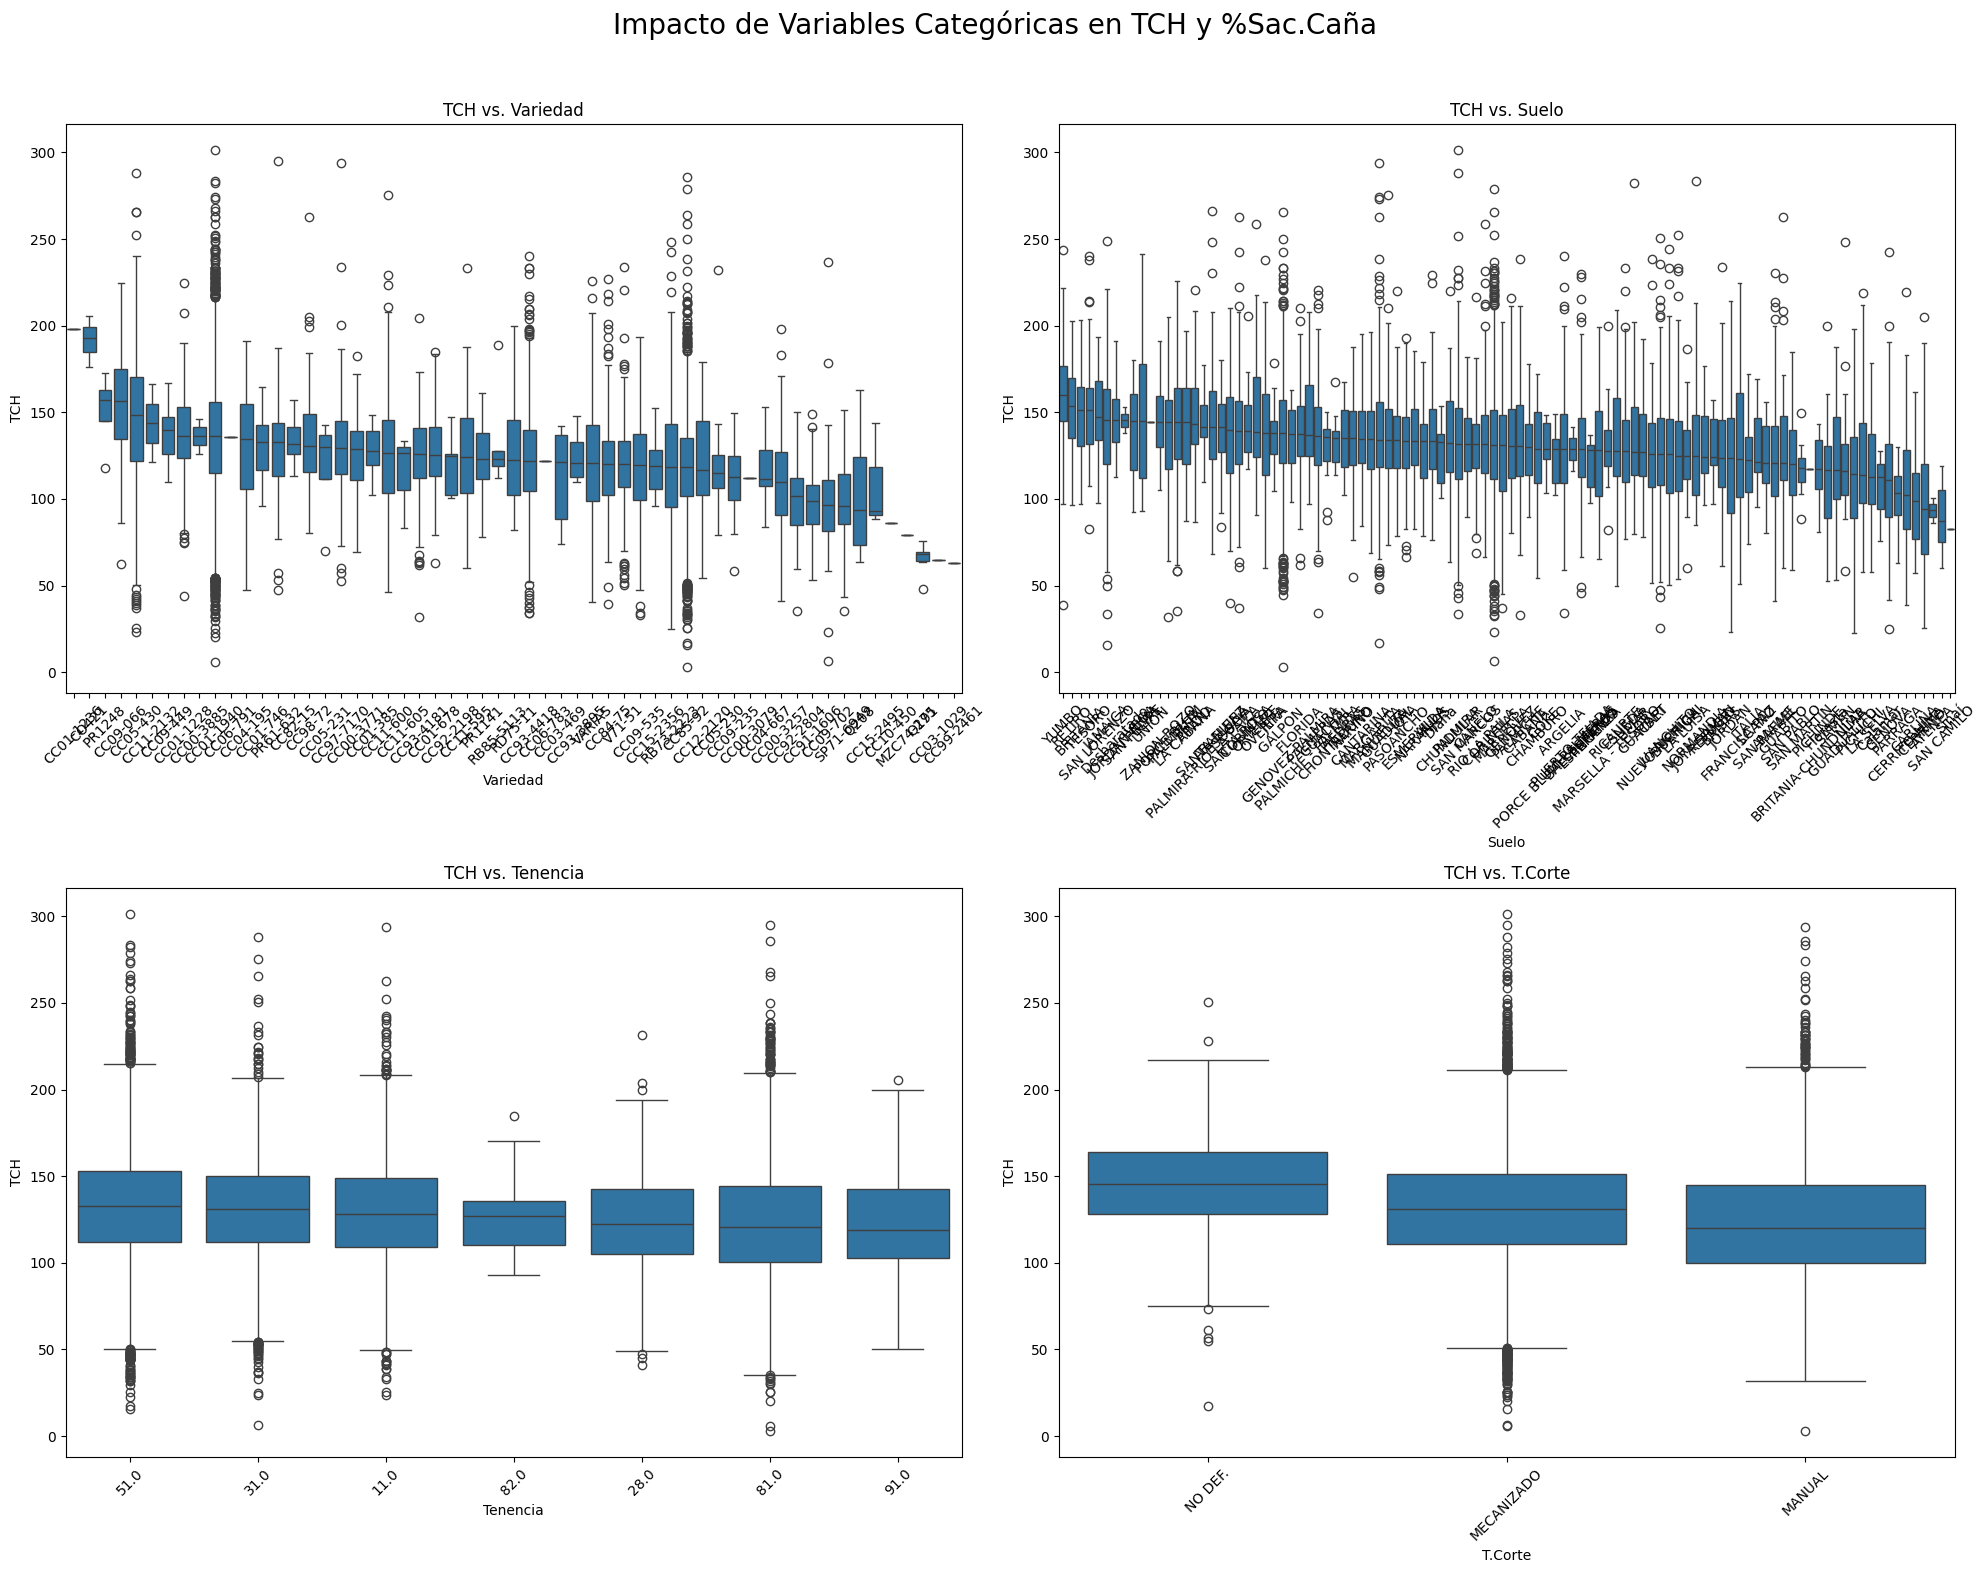

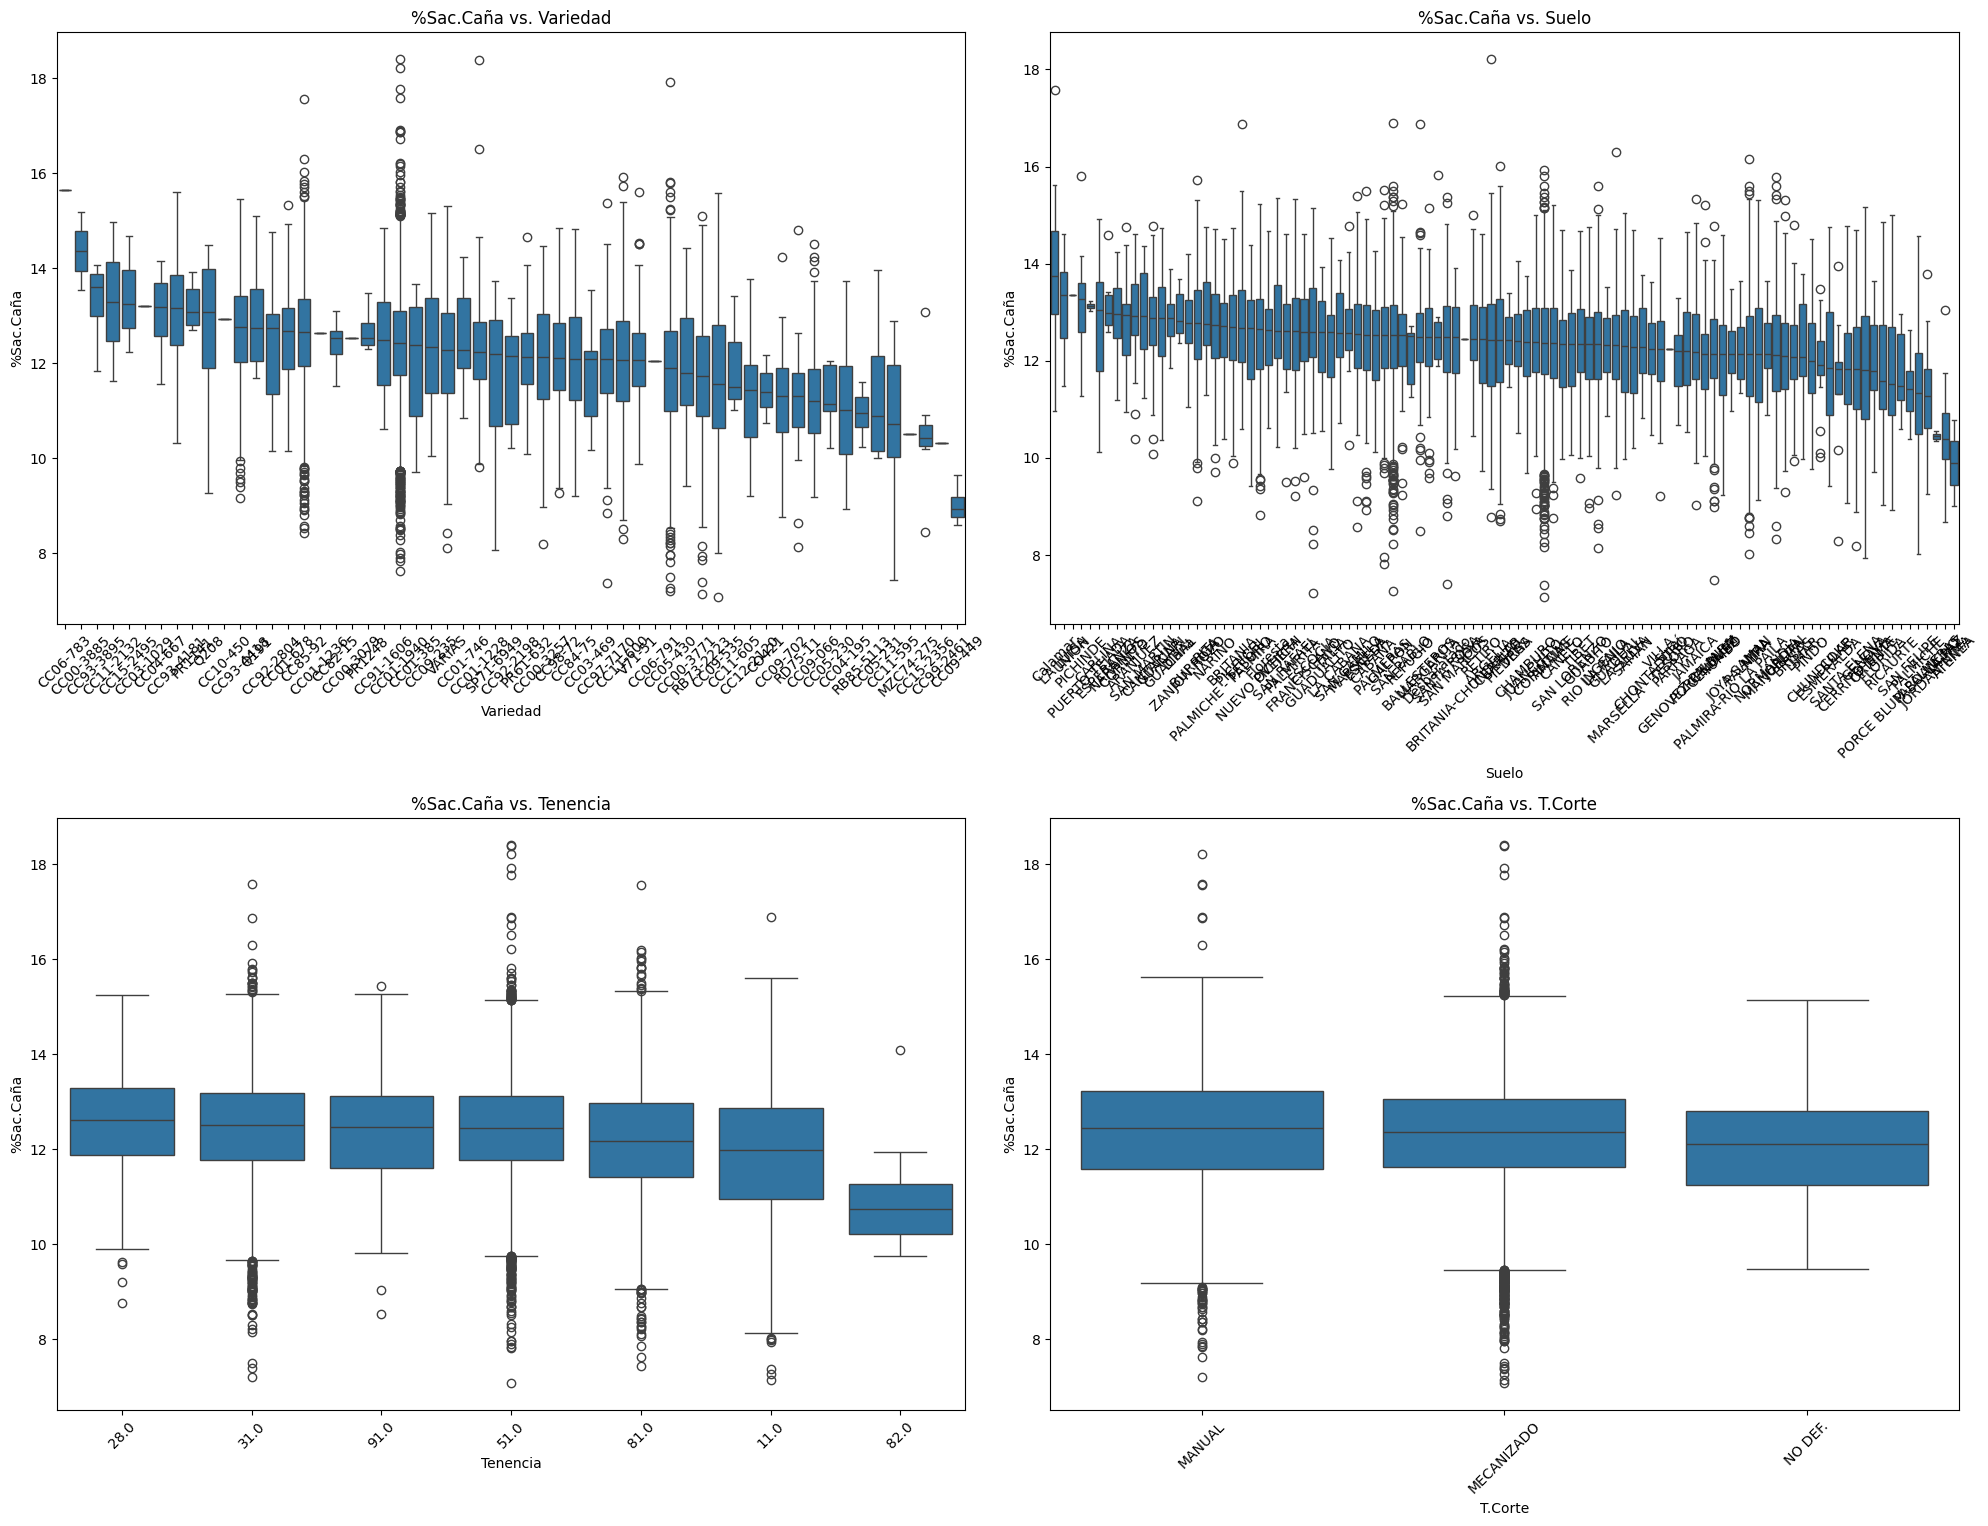

In [24]:
categorical_features = ['Variedad', 'Suelo', 'Tenencia', 'T.Corte']

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Impacto de Variables Categóricas en TCH y %Sac.Caña', fontsize=20)

# Para TCH
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['TCH'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='TCH', ax=axes[i//2, i%2], order=order)
    axes[i//2, i%2].set_title(f'TCH vs. {feature}')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Para %Sac.Caña
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
for i, feature in enumerate(categorical_features):
    order = df.groupby(feature)['%Sac.Caña'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=feature, y='%Sac.Caña', ax=axes[i//2, i%2], order=order)
    axes[i//2, i%2].set_title(f'%Sac.Caña vs. {feature}')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Variedad: Ciertas variedades de caña muestran medianas de TCH y %Sac.Caña claramente distintas, lo que la convierte en una variable predictiva muy prometedora.

Suelo: El tipo de suelo tiene un impacto visible tanto en la productividad como en la calidad. Algunos suelos consistentemente superan a otros.

Tenencia y Tipo de Corte: Estas variables también muestran diferencias en las distribuciones de las variables objetivo, aunque menos pronunciadas que la variedad y el suelo.

# Selección Estratégica de Características

## Exclusiones 

* Identificadores únicos: Hacienda, Nombre, Suerte. Estas columnas no generalizan y causarían sobreajuste.
* Fuga de Datos (Data Leakage): Ton.Azucar, Rdto, TAH, TAHM, TonUltCorte. Estas son calculadas después de la cosecha y no estarán disponibles al momento de hacer una predicción. Incluirlas daría resultados artificialmente perfectos.
* Redundancia y Metadatos: Cod.Estado # (redundante con Cod.Estado), Codigo Estacion (metadato sin valor predictivo directo).


# Propuesta de Características para Modelado

## Numéricas

Area Neta, Dist Km, Edad Ult Cos, Num.Riegos, Temp. Media Ciclo, Radiacion Solar Ciclo, Precipitacion Ciclo

Estas variables mostraron correlaciones (aunque no extremadamente altas) con las variables objetivo, tienen un buen porcentaje de datos no nulos y sentido agronómico. Por ejemplo, la edad del cultivo, el riego y las condiciones climáticas son factores lógicos que influyen en el rendimiento

## Categóricas
Zona, Tenencia, Suelo, Variedad, Cod.Estado, Cultivo, Tipo Quema, T.Corte

Los boxplots demostraron que estas variables tienen un impacto discernible en la distribución de TCH y %Sac.Caña. La variedad y el suelo, en particular, parecen ser predictores muy fuertes.



# Pipelines de Preprocesamiento y Modelado

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [26]:
# 1. Definir características finales
numeric_features = ['Area Neta', 'Dist Km', 'Edad Ult Cos', 'Num.Riegos', 'Temp. Media Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion Ciclo']
categorical_features = ['Zona', 'Tenencia', 'Suelo', 'Variedad', 'Cod.Estado', 'Cultivo', 'Tipo Quema', 'T.Corte']

In [27]:
# Limpiar columnas numéricas de caracteres no deseados
for col in numeric_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [33]:
df[numeric_features]

,Area Neta,Dist Km,Edad Ult Cos,Num.Riegos,Temp. Media Ciclo,Radiacion Solar Ciclo,Precipitacion Ciclo
0,6.00,4.3,12.81,NaN,NaN,NaN,NaN
1,1.45,NaN,11.14,NaN,NaN,NaN,NaN
2,8.24,23.0,12.32,5.0,NaN,NaN,NaN
3,1.05,66.5,9.79,NaN,NaN,NaN,NaN
4,4.53,17.0,11.53,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20970,7.96,5.0,12.39,17.0,30.478,445.221,1120.3
20971,42.74,42.0,12.48,11.0,NaN,NaN,NaN
20972,1.32,5.0,13.17,11.0,30.094,443.181,1144.3
20973,6.27,34.7,11.76,11.0,NaN,NaN,NaN


In [34]:
X = df[numeric_features + categorical_features]
y_tch = df['TCH']
y_sac = df['%Sac.Caña']


In [36]:
# 2. Pipelines de preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [37]:
# 3. División de datos
X_train, X_test, y_tch_train, y_tch_test = train_test_split(X, y_tch, test_size=0.2, random_state=42)
_, _, y_sac_train, y_sac_test = train_test_split(X, y_sac, test_size=0.2, random_state=42)

# Entrenamiento y Comparación de Modelos

In [38]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, target_name):
    """Función para entrenar y evaluar modelos para un objetivo específico."""
    
    models = {
        "Ridge": Ridge(),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42)
    }
    
    results = {}

    for name, model in models.items():
        # Crear el pipeline completo: preprocesador + modelo
        full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', model)])
        
        # Entrenar
        full_pipeline.fit(X_train, y_train)
        
        # Predecir
        y_pred = full_pipeline.predict(X_test)
        
        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = [mse, rmse, mae, r2]

    # Presentar resultados
    results_df = pd.DataFrame(results, index=['MSE', 'RMSE', 'MAE', 'R²']).T
    print(f"\n--- Resultados de Evaluación para {target_name} ---")
    print(results_df)
    return results_df

In [40]:
# Para TCH
results_tch = train_and_evaluate_models(X_train, y_tch_train, X_test, y_tch_test, "TCH")


--- Resultados de Evaluación para TCH ---
                         MSE       RMSE        MAE        R²
Ridge             756.732608  27.508773  20.977523  0.295273
RandomForest      594.245421  24.377150  18.057596  0.446593
GradientBoosting  689.502192  26.258374  20.131902  0.357883


In [41]:
# Para %Sac.Caña
results_sac = train_and_evaluate_models(X_train, y_sac_train, X_test, y_sac_test, "%Sac.Caña")


--- Resultados de Evaluación para %Sac.Caña ---
                       MSE      RMSE       MAE        R²
Ridge             1.056350  1.027789  0.804059  0.205199
RandomForest      0.873474  0.934598  0.722667  0.342796
GradientBoosting  0.967443  0.983587  0.767791  0.272093


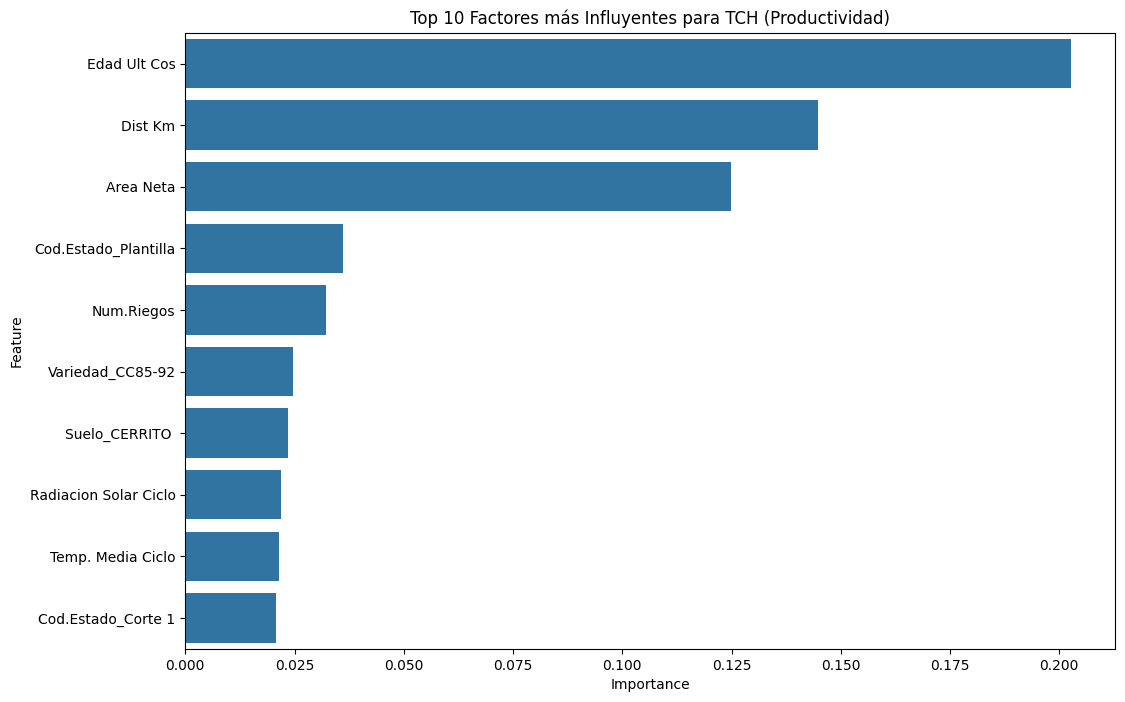

In [42]:
# Re-entrenar el mejor modelo para obtener las importancias
best_model_tch_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', RandomForestRegressor(random_state=42))])
best_model_tch_pipeline.fit(X, y_tch)

# Extraer nombres de características después del OneHotEncoding
feature_names = (numeric_features + 
                 list(best_model_tch_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

importances = best_model_tch_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Visualizar
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 10 Factores más Influyentes para TCH (Productividad)')
plt.show()

In [10]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [ ]:
# También podemos cuantificar esta relación usando una matriz de correlación.
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show() 

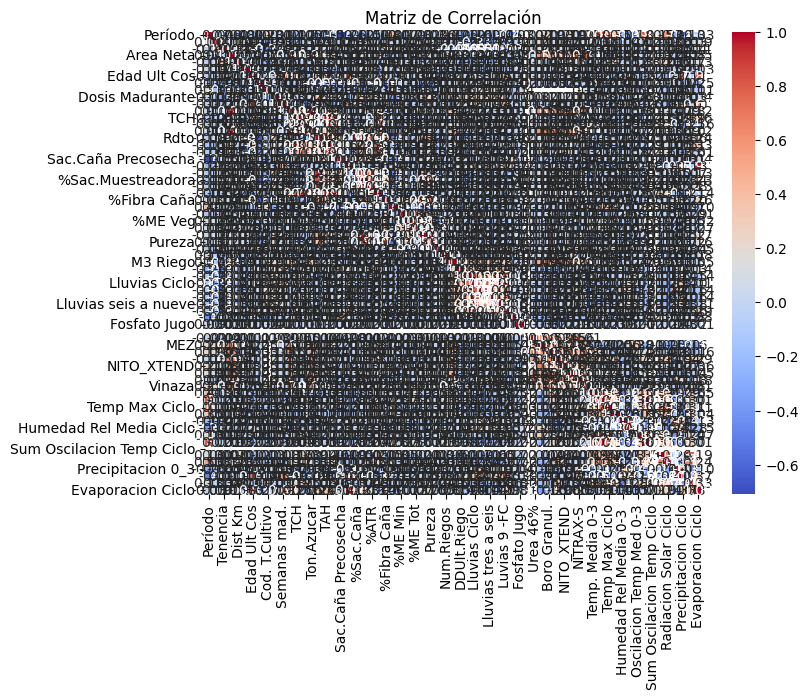

In [11]:
# También podemos cuantificar esta relación usando una matriz de correlación.
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show() 

Text(0.5, 1.0, 'Distribución de TCH')

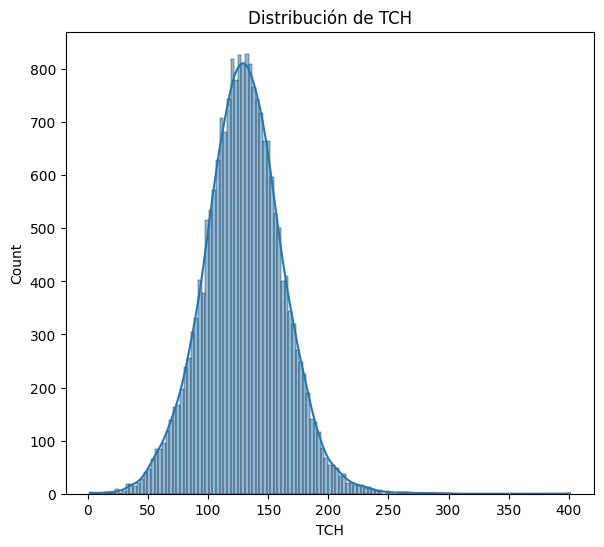

In [12]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['TCH'], kde=True)
plt.title('Distribución de TCH')

In [20]:
df[['TCH']]

,TCH
0,121.198333
1,93.793103
2,174.347087
3,136.790476
4,113.068432
...,...
21022,172.446666
21023,108.573770
21024,145.808108
21025,143.638287


In [17]:
print([col for col in df.columns if 'tc' in col.lower()])

['TonUltCorte', 'TCH', 'TCHM']


In [14]:
print([col for col in df.columns])

['Período', 'Hacienda', 'Nombre', 'Zona', 'Tenencia', 'Suerte', 'Suelo', 'Area Neta', 'Dist Km', 'Variedad', 'Cod.Estado #', 'Cod.Estado', 'F.Siembra', 'D.S.', 'Ult.Riego', 'Edad Ult Cos', 'F.Ult.Corte', 'Destino 1=Semilla', 'Cod. T.Cultivo', 'Cultivo', 'Fec.Madur.', 'Producto', 'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', 'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'Vejez', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC', '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ', 'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S', 'Vinaza', 'Codigo Estacion', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo'

In [15]:
df_select = df[[
    "Variedad", 
    "Edad Ult Cos", 
    "TonUltCorte", 
    "Area Neta", 
    "Suelo", 
    "F.Siembra",
    "Semanas mad.", 
    "Dosis Madurante", 
    "%Sac.Caña", 
    "Lluvias Ciclo",
    "Radicion Solar 0-3", 
    "Temp. Media Ciclo", 
    "Humedad Rel Media Ciclo",
    "Fert.Nitrogen.", 
    "%Infest.Diatrea", 
    "Num.Riegos"
]]

df_select

,Variedad,Edad Ult Cos,TonUltCorte,Area Neta,Suelo,F.Siembra,Semanas mad.,Dosis Madurante,%Sac.Caña,Lluvias Ciclo,Radicion Solar 0-3,Temp. Media Ciclo,Humedad Rel Media Ciclo,Fert.Nitrogen.,%Infest.Diatrea,Num.Riegos
0,CC85-92,12.81,727.190,6.00,CANTARINA,2010-08-20,8.428571,1.0,13.7582,1038.0,NaN,NaN,NaN,NaN,NaN,NaN
1,CC85-92,11.14,136.000,1.45,NaN,2011-01-27,NaN,0.0,12.8430,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,CC01-1228,12.32,1436.620,8.24,CORINTIAS,2011-10-25,8.428571,1.1,11.9364,1002.0,NaN,NaN,NaN,NaN,NaN,5.0
3,CC01-1940,9.79,143.630,1.05,NaN,2014-03-08,NaN,0.0,11.2770,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,RB73-2223,11.53,512.200,4.53,GALPON,2013-01-10,NaN,0.0,10.2160,991.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,CC05-430,11.63,517.340,3.00,LA PAZ,2018-07-07,NaN,0.0,NaN,1123.0,467.043,31.089,78.797,NaN,NaN,13.0
21023,CC05-430,11.89,132.460,1.22,LA PAZ,2022-04-22,NaN,0.0,NaN,1139.0,461.663,30.945,78.704,NaN,NaN,12.0
21024,CC05-430,11.89,269.745,1.85,LA PAZ,2020-09-15,NaN,0.0,NaN,1139.0,461.663,30.945,78.704,NaN,NaN,12.0
21025,CC05-430,11.70,4513.115,31.42,PALMIRA,2020-03-30,NaN,0.0,NaN,905.0,467.911,31.040,78.720,NaN,1.6367,7.0


In [ ]:
# Renombrar columnas para claridad y corregir problemas de codificación

{
    'PerÃ­odo': 'Periodo',
    '%Sac.Caña': 'SacCana',
    #'Sac.CaÃ±a Precosecha': 'SacCana_Precosecha',
    #'CosechÃ³': 'Cosecho',
    #'T.Corte': 'T_Corte',
    #'Lluvias (2 Meses Ant.)': 'Lluvias_2M_Ant',
    #'Lluvias Ciclo': 'Lluvias_Ciclo',
    #'Lluvias 0 -3': 'Lluvias_0_3',
    #'Lluvias tres a seis': 'Lluvias_3_6',
    #'Lluvias seis a nueve': 'Lluvias_6_9',
    #'Luvias 9 -FC': 'Lluvias_9_FC',
    #'Temp. Media 0-3': 'Temp_Media_0_3',
    #'Temp. Media Ciclo': 'Temp_Media_Ciclo',
    #'Temp Max Ciclo': 'Temp_Max_Ciclo',
    #'Temp Min Ciclo': 'Temp_Min_Ciclo',
    #'Humedad Rel Media 0-3 ': 'Humedad_Rel_Media_0_3',
    #'Humedad Rel Media Ciclo': 'Humedad_Rel_Media_Ciclo',
    #'Oscilacion Temp Med 0-3': 'Oscilacion_Temp_Med_0_3',
    #'Oscilacion Temp Ciclo': 'Oscilacion_Temp_Ciclo',
    #'Sum Oscilacion Temp Ciclo': 'Sum_Oscilacion_Temp_Ciclo',
    #'Radicion Solar 0-3': 'Radiacion_Solar_0_3',
    #'Radiacion Solar Ciclo': 'Radiacion_Solar_Ciclo',
    # 'Precipitacion 0_3': 'Precipitacion_0_3',
    # 'Precipitacion Ciclo': 'Precipitacion_Ciclo',
    # 'Evaporacion 0-3': 'Evaporacion_0_3',
    # 'Evaporacion Ciclo': 'Evaporacion_Ciclo',
    # 'Ton.Azucar': 'Ton_Azucar',
    # 'F.Siembra': 'F_Siembra',
    # 'Ult.Riego': 'Ult_Riego',
    # 'F.Ult.Corte': 'F_Ult_Corte'
}

df_rename = df.rename(columns=)



In [79]:
print(df_rename)

       Período  Hacienda             Nombre  Zona  Tenencia Suerte  \
0       201701     80493          LA CONCHA  IP02      51.0   002A   
1       201701     81284    UKRANIA INCAUCA  IP05      81.0   039B   
2       201701     80203      EL AMPARO SAA  IP05      31.0    007   
3       201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A   
4       201701     80298               JAVA  IP06      31.0   025A   
...        ...       ...                ...   ...       ...    ...   
21022   202407     80102             LA PAZ  IP01      11.0   051B   
21023   202407     80102             LA PAZ  IP01      11.0   054C   
21024   202407     80102             LA PAZ  IP01      11.0   054E   
21025   202407     80104            SAMARIA  IP02      11.0    165   
21026   202407     80124        SANTA LUCIA  IP02      11.0    001   

            Suelo  Area Neta  Dist Km   Variedad  ...  \
0       CANTARINA       6.00      4.3    CC85-92  ...   
1             NaN       1.45      NaN    CC85

In [ ]:
# Calcular el porcentaje de valores faltantes por columna
missing_values_percent = df.isnull().sum() / len(df) * 100
print("Porcentaje de valores faltantes por columna (solo > 0%):")
print(missing_values_percent[missing_values_percent > 0].sort_values(ascending=False))

# Eliminar columnas con más del 50% de valores faltantes
columns_to_drop = missing_values_percent[missing_values_percent > 50].index
df_cleaned = df.drop(columns=columns_to_drop)

print("\nColumnas eliminadas debido a un alto porcentaje de valores faltantes (>50%):")
print(columns_to_drop.tolist())

In [65]:
# Mostrar estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(df_cleaned.describe())


Estadísticas descriptivas de las variables numéricas:
             Período      Hacienda      Tenencia     Area Neta       Dist Km  \
count   21027.000000  21027.000000  21026.000000  21027.000000  21022.000000   
mean   202039.708708  80679.334427     46.448730      8.642948     25.311806   
min    201701.000000  80100.000000     11.000000      0.004000      1.100000   
25%    201812.000000  80247.000000     31.000000      3.310000     12.000000   
50%    202010.000000  80453.000000     51.000000      7.000000     21.900000   
75%    202209.000000  81104.000000     51.000000     12.075000     32.700000   
max    202407.000000  82557.000000     91.000000     65.000000    155.000000   
std       216.642895    590.030150     21.513498      7.049533     18.237344   

       Cod.Estado #                      F_Siembra  Edad Ult Cos  \
count  21027.000000                          21027   21027.00000   
mean       4.261806  2015-03-11 18:18:44.839492096      13.01111   
min        0.000000 

In [67]:
df

,Período,Hacienda,Nombre,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Humedad_Rel_Media_Ciclo,Oscilacion_Temp_Med_0_3,Oscilacion_Temp_Ciclo,Sum_Oscilacion_Temp_Ciclo,Radiacion_Solar_0_3,Radiacion_Solar_Ciclo,Precipitacion_0_3,Precipitacion_Ciclo,Evaporacion_0_3,Evaporacion_Ciclo
0,201701,80493,LA CONCHA,IP02,51.0,002A,CANTARINA,6.00,4.3,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201701,81284,UKRANIA INCAUCA,IP05,81.0,039B,NaN,1.45,NaN,CC85-92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201701,80203,EL AMPARO SAA,IP05,31.0,007,CORINTIAS,8.24,23.0,CC01-1228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201701,81380,SAN JUDAS INCAUCA,IP05,82.0,013A,NaN,1.05,66.5,CC01-1940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201701,80298,JAVA,IP06,31.0,025A,GALPON,4.53,17.0,RB73-2223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21022,202407,80102,LA PAZ,IP01,11.0,051B,LA PAZ,3.00,1.8,CC05-430,...,78.797,16.4,31.089,NaN,467.043,444.382,177.3,1037.8,542.2,1824.6
21023,202407,80102,LA PAZ,IP01,11.0,054C,LA PAZ,1.22,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21024,202407,80102,LA PAZ,IP01,11.0,054E,LA PAZ,1.85,1.8,CC05-430,...,78.704,17.8,30.945,NaN,461.663,444.528,168.7,1041.6,536.4,1867.2
21025,202407,80104,SAMARIA,IP02,11.0,165,PALMIRA,31.42,3.5,CC05-430,...,78.720,17.8,31.040,NaN,467.911,444.839,177.3,1037.8,544.2,1843.9


KeyError: 'SacCana'

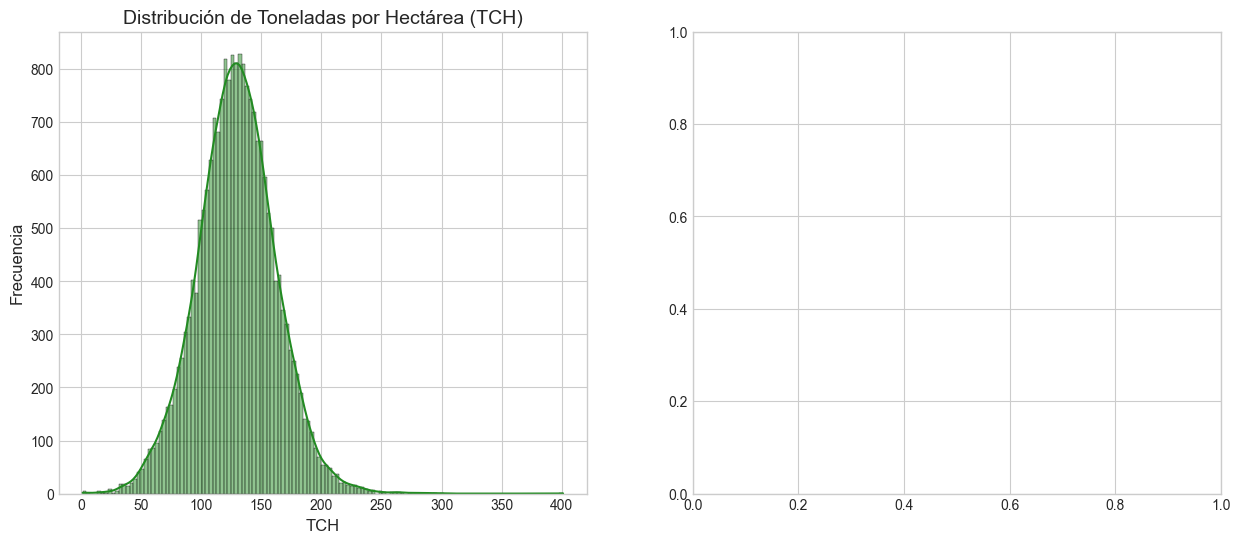

In [66]:
# Configurar el estilo de los gráficos
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 6))

# Gráfico de la distribución de TCH
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['TCH'], kde=True, color='forestgreen')
plt.title('Distribución de Toneladas por Hectárea (TCH)', fontsize=14)
plt.xlabel('TCH', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Gráfico de la distribución de %Sac.Caña
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['SacCana'], kde=True, color='darkorange')
plt.title('Distribución de % Sacarosa en Caña', fontsize=14)
plt.xlabel('% Sacarosa', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.tight_layout()
plt.show()

# Gráfico de dispersión para ver la relación entre TCH y SacCana
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TCH', y='SacCana', data=df_cleaned, alpha=0.6, color='dodgerblue')
plt.title('Relación entre TCH y % Sacarosa en Caña', fontsize=16)
plt.xlabel('Toneladas por Hectárea (TCH)', fontsize=12)
plt.ylabel('Porcentaje de Sacarosa en Caña', fontsize=12)
plt.show()